In [2]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

In [3]:
y, sr = librosa.load('wav_files/20000_Rock_music.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [4]:
Audio(y, rate=sr)

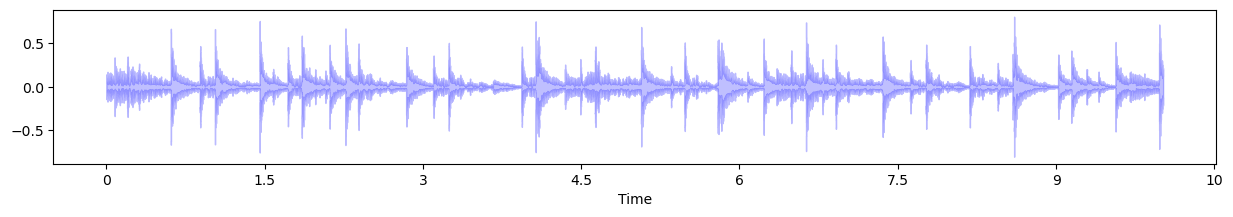

In [20]:
# plt.figure(figsize=(15,2))
# librosa.display.AdaptiveWaveplot(y  = y,
#                      sr     = sr, 
#                      max_sr = 1000, 
#                      alpha  = 0.25, 
#                      color  = 'blue')

plt.figure(figsize=(15, 2))
librosa.display.waveshow(y, sr=sr, alpha=0.25, color='blue')
plt.show()

### Apply Pre-emphasis Filter
A pre-emphasis filter is useful in several ways: <br>(1) balance the frequency spectrum since high frequencies usually have smaller magnitudes compared to lower frequencies, <br>(2) avoid numerical problems during the Fourier transform operation and <br>(3) may also improve the Signal-to-Noise Ratio (SNR).<br>
Source: http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

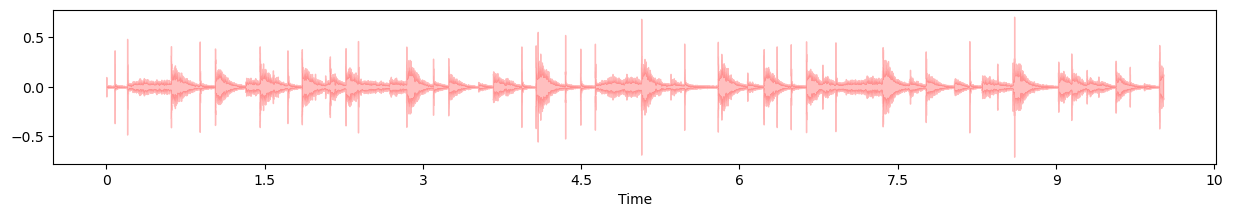

In [22]:
pre_emphasis = 0.97
y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr, 
                     alpha  = 0.25, 
                     color  = 'red')

### Fourier Transform

Figure 1 - Linear Amplitudes (color map)

FT Shape (1025, 432)


Text(0.5, 1.0, 'Linear Amplitude')

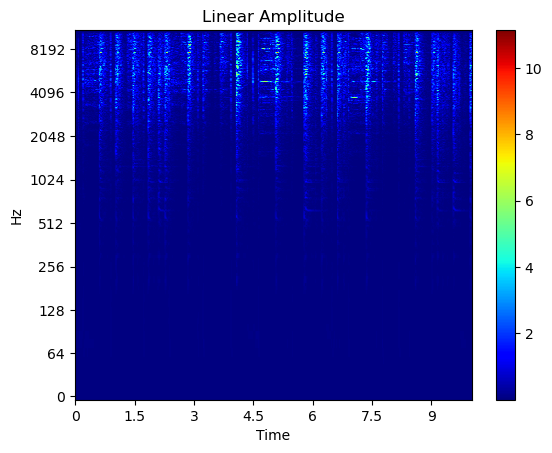

In [23]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
print('FT Shape', D.shape)

# Y-axis can be linear or log or mel
librosa.display.specshow(np.abs(D), x_axis='time', y_axis='log', cmap=cm.jet,) # Take magnitude of complex number
plt.colorbar()
plt.title('Linear Amplitude')

Figure 2 - Log Amplitude

/var/folders/5h/xd0mtjm95gj4hw5b9__7w4g80000gn/T/ipykernel_3302/2036991550.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_amplitude = librosa.amplitude_to_db(D, ref=np.max)


Text(0.5, 1.0, 'Log Amplitude')

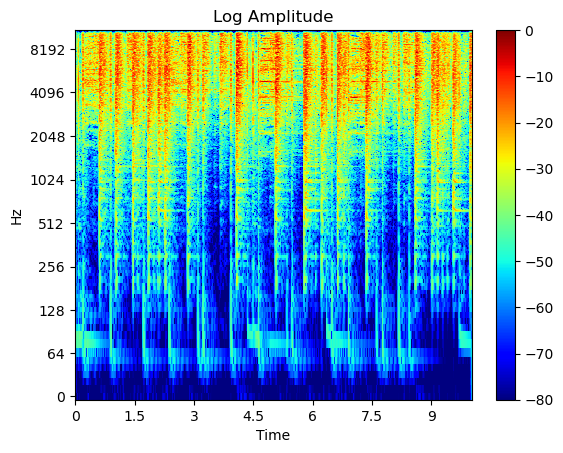

In [25]:
# log_amplitude = librosa.logamplitude(D, ref=np.max)
log_amplitude = librosa.amplitude_to_db(D, ref=np.max)

librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Amplitude')

Figure 3 -Log Power (Log power spectrogram seems to be the most informative among the three)

/var/folders/5h/xd0mtjm95gj4hw5b9__7w4g80000gn/T/ipykernel_3302/3554040209.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_amplitude = librosa.amplitude_to_db(D**2, ref=np.max) # Square amplitude and then take log


Text(0.5, 1.0, 'Log Power')

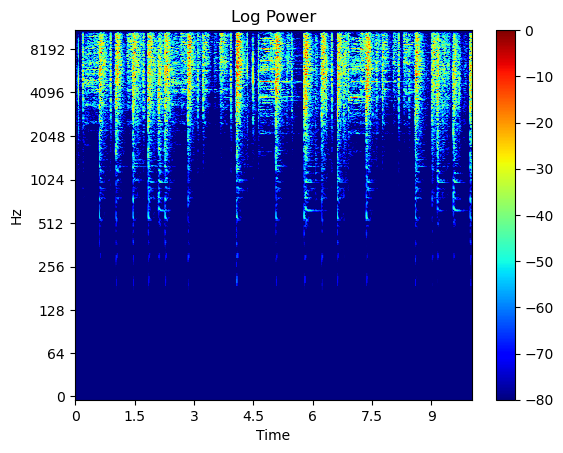

In [26]:
log_amplitude = librosa.amplitude_to_db(D**2, ref=np.max) # Square amplitude and then take log
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Power')

### CQT Transform

Transform shape (84, 432)


/var/folders/5h/xd0mtjm95gj4hw5b9__7w4g80000gn/T/ipykernel_3302/351697556.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  log_power = librosa.amplitude_to_db(C**2, ref=np.max)


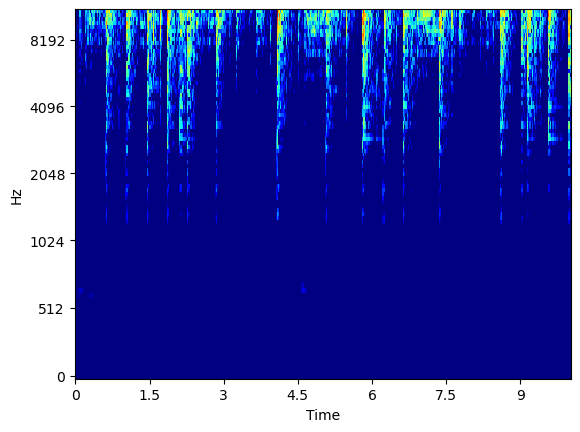

In [28]:
C = librosa.cqt(y, sr=sr, n_bins=84)
print('Transform shape', C.shape) 
log_power = librosa.amplitude_to_db(C**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)

### MEL Spectrogram

MEL scale is linear at lower frequency and logarithmic at higher frequency. - more like human hearing perception

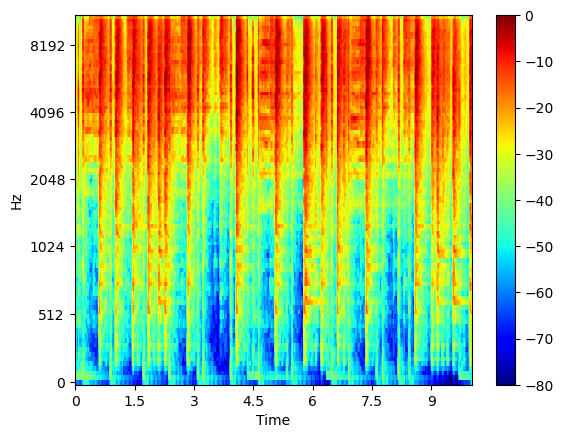

In [30]:
M = librosa.feature.melspectrogram(y=y, sr=sr, fmax = sr/2, n_fft=2048, hop_length=512, 
                                   n_mels = 96, power = 2) # Power = 2 refers to squared amplitude 
                                                           # Hanning window by default
log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)
plt.colorbar()

To save and load image

In [31]:
pylab.figure(figsize=(3,3))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(log_power, cmap=cm.jet)
pylab.savefig('test.jpg', bbox_inches=None, pad_inches=0)
pylab.close()

In [32]:
im = Image.open("test.jpg", )
np.asarray(im).shape

(300, 300, 3)

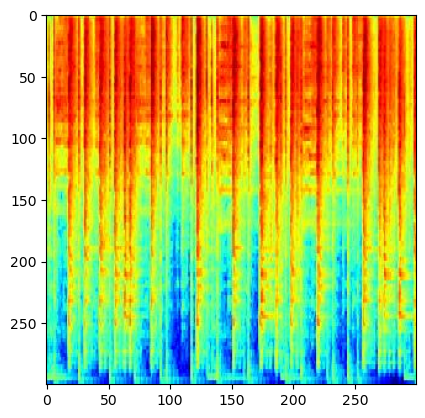

In [33]:
imshow(np.asarray(im))

In [2]:
import os
import librosa
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import pylab

In [3]:
WAV_DIR = 'wav_files/'
IMG_DIR = 'spectrogram_images/'
wav_files = os.listdir(WAV_DIR)
img_files = os.listdir(IMG_DIR)
print(len(img_files))
print(len(wav_files))
print(wav_files[17000:])

35224
35224
['26596_Rock_music.wav', '26597_Pop_music.wav', '26598_Techno.wav', '26604_Rock_music.wav', '26605_Rock_music.wav', '26606_Reggae.wav', '26607_Rock_music.wav', '26608_Pop_music.wav', '26609_Reggae.wav', '26610_Rock_music.wav', '26611_Rock_music.wav', '26613_Vocal.wav', '26614_Pop_music.wav', '26616_Techno.wav', '26619_Rhythm_blues.wav', '26620_Techno.wav', '26622_Reggae.wav', '26623_Pop_music.wav', '26625_Vocal.wav', '26626_Rock_music.wav', '26627_Techno.wav', '26633_Pop_music.wav', '26634_Techno.wav', '26635_Pop_music.wav', '26639_Techno.wav', '26642_Vocal.wav', '26644_Techno.wav', '26645_Techno.wav', '26646_Rock_music.wav', '26647_Techno.wav', '26648_Hip_hop_music.wav', '26649_Techno.wav', '26654_Techno.wav', '26655_Pop_music.wav', '26656_Pop_music.wav', '26658_Rhythm_blues.wav', '26659_Pop_music.wav', '26660_Vocal.wav', '26663_Reggae.wav', '26664_Reggae.wav', '26665_Pop_music.wav', '26668_Techno.wav', '26670_Vocal.wav', '26672_Techno.wav', '26673_Rock_music.wav', '26675_

In [11]:
for i,f in enumerate(wav_files):
    if(i>17000):
        print(f)
        try:
            # Read wav-file
            y, sr = librosa.load(WAV_DIR+f, sr = 22050) # Use the default sampling rate of 22,050 Hz
            
            # Compute spectrogram
            M = librosa.feature.melspectrogram(y=y, sr=sr, 
                                            fmax = sr/2, # Maximum frequency to be used on the on the MEL scale
                                            n_fft=2048, 
                                            hop_length=512, 
                                            n_mels = 96, # Set as per the Google Large-scale audio CNN paper
                                            power = 2) # Power = 2 refers to squared amplitude
            
            # Power in DB
            log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
            
            # Plotting the spectrogram
            pylab.figure(figsize=(5,5))
            pylab.axis('off') 
            pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
            librosa.display.specshow(log_power, cmap=cm.jet)
            pylab.savefig(IMG_DIR + f[:-4]+'.jpg', bbox_inches=None, pad_inches=0)
            pylab.close()

        except Exception as e:
            print(f, e)
            pass

26597_Pop_music.wav
26598_Techno.wav
26604_Rock_music.wav
26605_Rock_music.wav
26606_Reggae.wav
26607_Rock_music.wav
26608_Pop_music.wav
26609_Reggae.wav
26610_Rock_music.wav
26611_Rock_music.wav
26613_Vocal.wav
26614_Pop_music.wav
26616_Techno.wav
26619_Rhythm_blues.wav
26620_Techno.wav
26622_Reggae.wav
26623_Pop_music.wav
26625_Vocal.wav
26626_Rock_music.wav
26627_Techno.wav
26633_Pop_music.wav
26634_Techno.wav
26635_Pop_music.wav
26639_Techno.wav
26642_Vocal.wav
26644_Techno.wav
26645_Techno.wav
26646_Rock_music.wav
26647_Techno.wav
26648_Hip_hop_music.wav
26649_Techno.wav
26654_Techno.wav
26655_Pop_music.wav
26656_Pop_music.wav
26658_Rhythm_blues.wav
26659_Pop_music.wav
26660_Vocal.wav
26663_Reggae.wav
26664_Reggae.wav
26665_Pop_music.wav
26668_Techno.wav
26670_Vocal.wav
26672_Techno.wav
26673_Rock_music.wav
26675_Pop_music.wav
26676_Rhythm_blues.wav
26677_Vocal.wav
26678_Hip_hop_music.wav
26679_Techno.wav
26681_Hip_hop_music.wav
26683_Techno.wav
26684_Pop_music.wav
26685_Rock_musi

/Users/macuser/miniconda3/envs/csci1470/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


32916_Pop_music.wav
32918_Pop_music.wav
32920_Techno.wav
32922_Pop_music.wav
32923_Techno.wav
32925_Techno.wav
32927_Techno.wav
32931_Techno.wav
32932_Rock_music.wav
32933_Rock_music.wav
32935_Techno.wav
32936_Rock_music.wav
32937_Techno.wav
32938_Techno.wav
32939_Rock_music.wav
32940_Rhythm_blues.wav
32941_Rock_music.wav
32942_Pop_music.wav
32944_Rock_music.wav
32945_Techno.wav
32946_Techno.wav
32948_Pop_music.wav
32949_Hip_hop_music.wav
32950_Pop_music.wav
32953_Rock_music.wav
32955_Hip_hop_music.wav
32956_Rhythm_blues.wav
32959_Techno.wav
32960_Rhythm_blues.wav
32961_Vocal.wav
32964_Techno.wav
32965_Reggae.wav
32966_Vocal.wav
32967_Techno.wav
32968_Rock_music.wav
32969_Rock_music.wav
32970_Hip_hop_music.wav
32971_Vocal.wav
32973_Rock_music.wav
32977_Vocal.wav
32980_Rock_music.wav
32981_Pop_music.wav
32982_Hip_hop_music.wav
32983_Pop_music.wav
32984_Techno.wav
32988_Techno.wav
32989_Pop_music.wav
32993_Rock_music.wav
32995_Hip_hop_music.wav
33000_Techno.wav
33001_Techno.wav
33004_Tec

: 